In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [5]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [6]:
mensual_p = mensual['n_trips']

In [7]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [8]:
mensual_p = mensual_p.reset_index()

In [9]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [107]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 20, mcmc_samples=100, interval_width= 0.8, seasonality_prior_scale=5,changepoint_prior_scale =0.04 )

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/ygiz77az.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/3s1w7cmt.json
00:32:25 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=71138', 'data', 'file=/tmp/tmplnvzjdhf/ygiz77az.json', 'init=/tmp/tmplnvzjdhf/3s1w7cmt.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelwaicxay7/prophet_model-20241119003226_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=71138', 'data', 'file=/tmp/tmplnvzjdhf/ygiz77az.json', 'init=/tmp/tmplnvzjdhf/3s1w7cmt.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelwaicxay7/prophet_model-20241119003226_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

00:32:27 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=71138', 'data', 'file=/tmp/tmplnvzjdhf/ygiz77az.json', 'init=/tmp/tmplnvzjdhf/3s1w7cmt.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelwaicxay7/prophet_model-20241119003226_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelwaicxay7/prophet_model-20241119003226_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelwaicxay7/prophet_model-20241119003226_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [108]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.826850e+06,2.938989e+06,3.239022e+06,2.738914e+06,2.921558e+06,249871.930008,160573.261219,335878.956346,249871.930008,160573.261219,335878.956346,0.0,0.0,0.0,3.076722e+06
1,2022-04-30,2.812265e+06,2.817430e+06,3.114781e+06,2.731650e+06,2.895141e+06,150073.250800,52057.922655,231717.290513,150073.250800,52057.922655,231717.290513,0.0,0.0,0.0,2.962338e+06
2,2022-05-31,2.797327e+06,2.906122e+06,3.209464e+06,2.725730e+06,2.871946e+06,235790.985613,145864.858932,309476.798730,235790.985613,145864.858932,309476.798730,0.0,0.0,0.0,3.033118e+06
3,2022-06-30,2.782952e+06,2.785940e+06,3.058411e+06,2.714234e+06,2.842488e+06,130507.187834,50808.812944,211735.272549,130507.187834,50808.812944,211735.272549,0.0,0.0,0.0,2.913459e+06
4,2022-07-31,2.767299e+06,2.470535e+06,2.753047e+06,2.703368e+06,2.826876e+06,-172516.476150,-248671.957325,-95876.564811,-172516.476150,-248671.957325,-95876.564811,0.0,0.0,0.0,2.594783e+06
5,2022-08-31,2.751055e+06,2.394769e+06,2.662130e+06,2.687243e+06,2.815750e+06,-227789.776070,-301155.657386,-144334.784177,-227789.776070,-301155.657386,-144334.784177,0.0,0.0,0.0,2.523265e+06
6,2022-09-30,2.734052e+06,2.359242e+06,2.678654e+06,2.669445e+06,2.799541e+06,-209718.616193,-310432.586831,-100977.192681,-209718.616193,-310432.586831,-100977.192681,0.0,0.0,0.0,2.524333e+06
7,2022-10-31,2.714939e+06,2.825456e+06,3.092532e+06,2.651145e+06,2.775496e+06,235762.058978,115263.977482,362405.618296,235762.058978,115263.977482,362405.618296,0.0,0.0,0.0,2.950701e+06
8,2022-11-30,2.695608e+06,2.484500e+06,2.784558e+06,2.634215e+06,2.758334e+06,-60708.199973,-140939.284878,18110.359430,-60708.199973,-140939.284878,18110.359430,0.0,0.0,0.0,2.634900e+06
9,2022-12-31,2.675366e+06,2.560653e+06,2.889409e+06,2.611592e+06,2.738857e+06,51448.825104,-59247.979093,159615.845250,51448.825104,-59247.979093,159615.845250,0.0,0.0,0.0,2.726815e+06


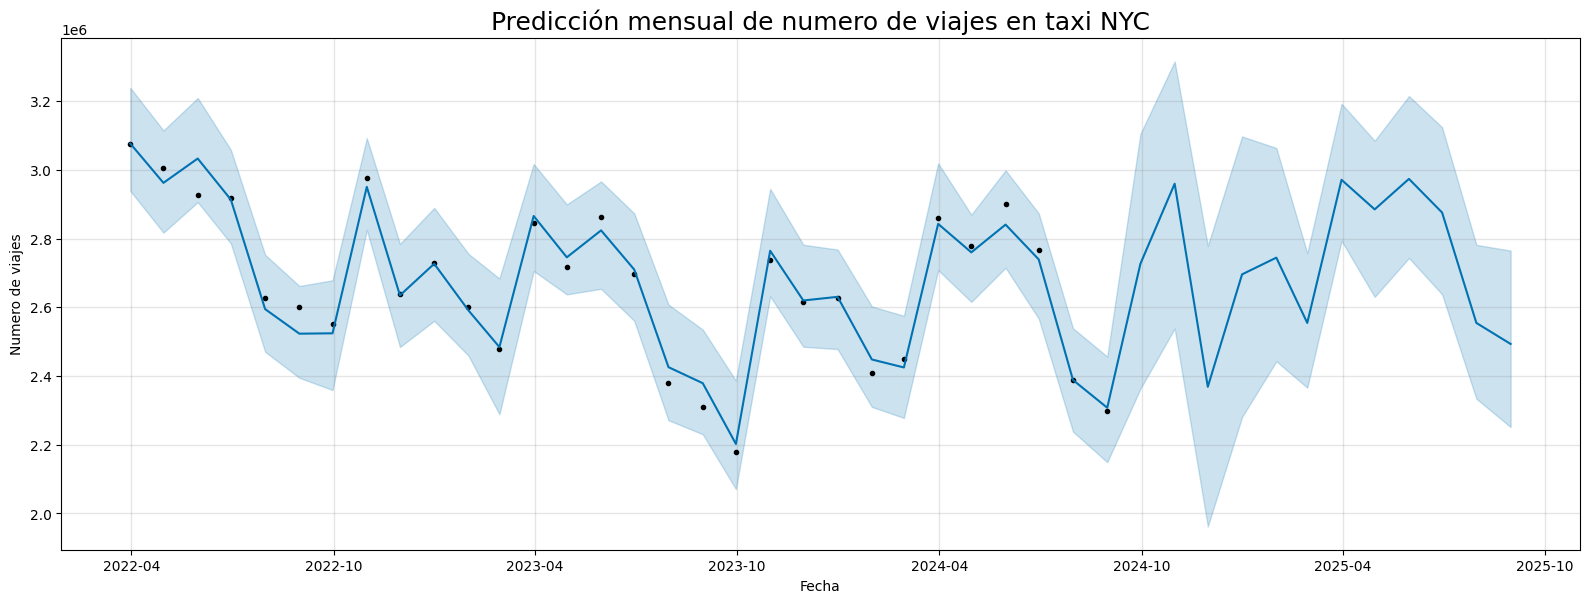

In [109]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

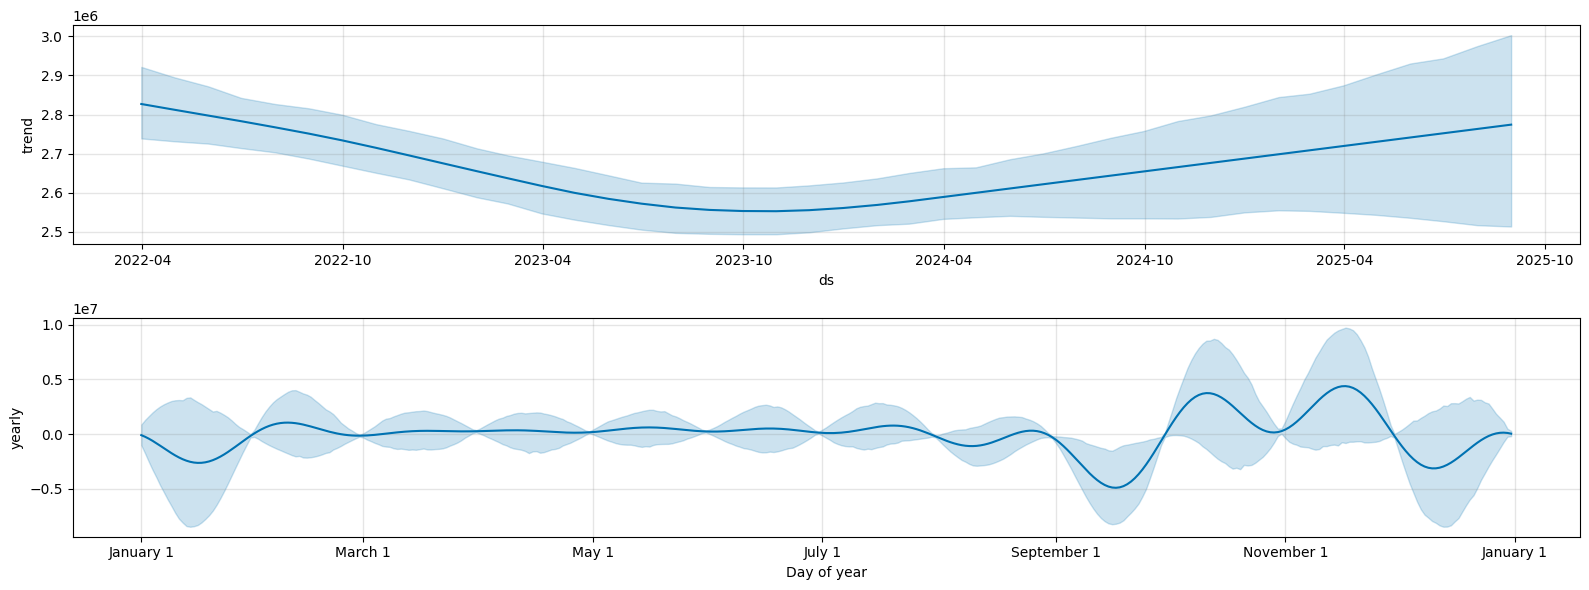

In [110]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [111]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [112]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/3v38jz4p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/e3ww68x9.json
00:32:29 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=28513', 'data', 'file=/tmp/tmplnvzjdhf/3v38jz4p.json', 'init=/tmp/tmplnvzjdhf/e3ww68x9.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modeldz_za8pe/prophet_model-20241119003229_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=28513', 'data', 'file=/tmp/tmplnvzjdhf/3v38jz4p.json', 'init=/tmp/tmplnvzjdhf/e3ww68x9.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modeldz_za8pe/prophet_model-20241119003229_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

00:32:33 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=28513', 'data', 'file=/tmp/tmplnvzjdhf/3v38jz4p.json', 'init=/tmp/tmplnvzjdhf/e3ww68x9.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modeldz_za8pe/prophet_model-20241119003229_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modeldz_za8pe/prophet_model-20241119003229_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modeldz_za8pe/prophet_model-20241119003229_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [113]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,2.524768e+06,4.373784e+05,5.191128e+06,2179200,2023-09-01
1,2023-10-31,2.611973e+06,1.128035e+06,3.986717e+06,2736389,2023-09-01
2,2023-11-30,2.800719e+06,8.094839e+05,4.420213e+06,2616757,2023-09-01
3,2023-12-31,2.088615e+06,2.892001e+05,3.903333e+06,2625768,2023-09-01
4,2024-01-31,2.387437e+06,3.814909e+05,4.244789e+06,2409342,2023-09-01
5,2024-02-29,1.947046e+06,-2.688212e+06,5.391249e+06,2448952,2023-09-01
6,2024-03-31,2.109754e+06,-6.152592e+05,4.386300e+06,2858661,2023-09-01
7,2024-04-30,2.612947e+06,7.527917e+05,4.383316e+06,2777362,2023-09-01
8,2024-05-31,3.080387e+06,7.301903e+05,5.864030e+06,2899539,2023-09-01
9,2024-06-30,2.239238e+06,-3.876559e+05,4.838947e+06,2767032,2023-09-01


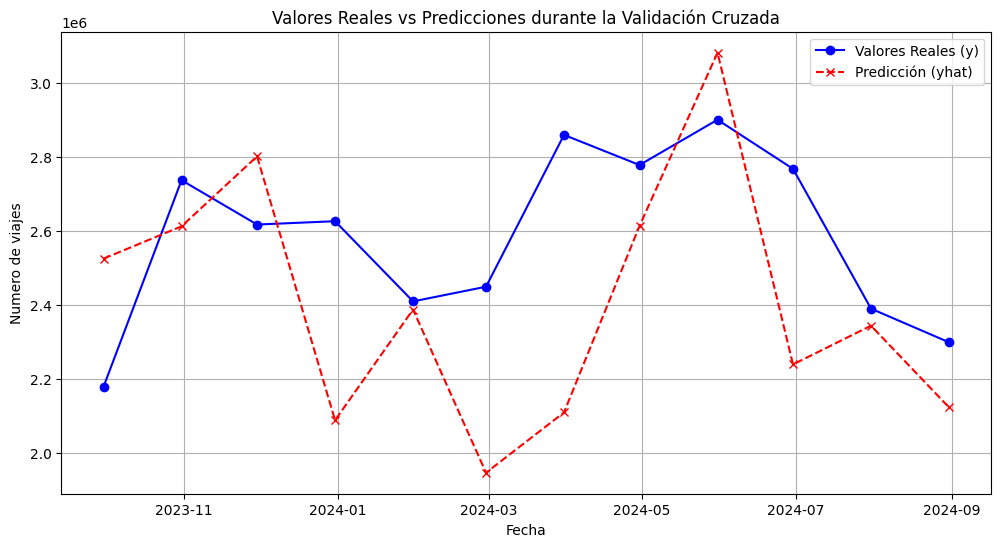

In [114]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


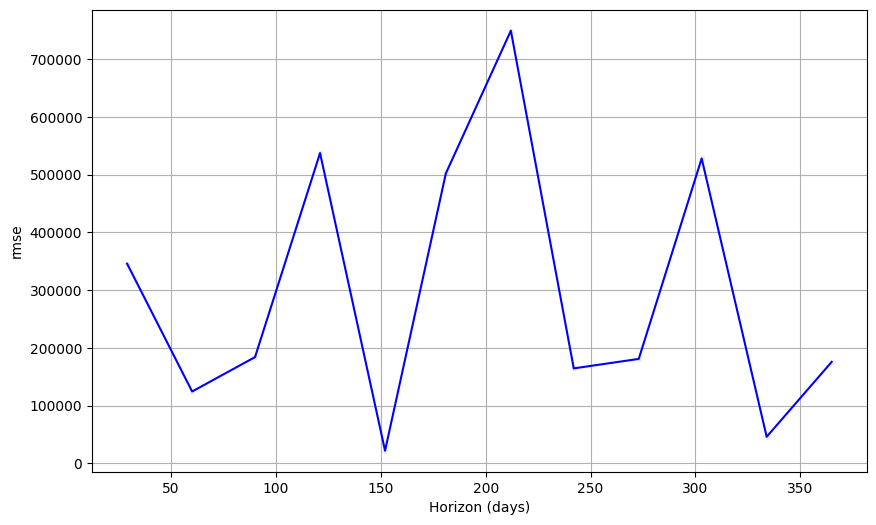

In [115]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [116]:
df_p_1 = performance_metrics(df_cv_1)

In [117]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 296547.2212140989


In [118]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 296547.2212140989


In [119]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 1.0


In [120]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.11357620473227131


In [121]:
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.0
mean,196 days 20:00:00,1.368170e+11,296547.221214,296547.221214,0.113576,0.113576,0.121619,1.0
std,109 days 20:33:46.987269072,1.738993e+11,230911.347891,230911.347891,0.085235,0.085235,0.097438,0.0
min,29 days 00:00:00,4.798240e+08,21904.884228,21904.884228,0.009092,0.009092,0.009133,1.0
25%,113 days 06:00:00,2.414406e+10,154415.243659,154415.243659,0.055765,0.055765,0.056995,1.0
50%,196 days 12:00:00,3.327390e+10,182404.694923,182404.694923,0.073355,0.073355,0.073679,1.0
75%,280 days 12:00:00,2.585741e+11,508378.282392,508378.282392,0.194200,0.194200,0.215109,1.0
max,365 days 00:00:00,5.608610e+11,748906.514307,748906.514307,0.261978,0.261978,0.301467,1.0


In [122]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,1.368170e+11,369887.776827,296547.221214,0.113576,0.073355,0.121619,1.0


In [123]:
#forecast_1.to_csv('forecast_mensual.csv')